**Atividade 1. Equalização de histograma e limiarização**

---



O histograma é uma ferramenta estatística que nos auxília a analisar a relação de tons entre os pixels de uma imagem. É apresentado na forma de um gráfico de barras, e apresenta a distribuição de tons de uma imagem.
A principal serventia do histograma é nos ajudar a verificar o contraste e luminosidade média de uma imagem e sua manipulação pode ser utilizado para realce nas imagens. 

A principal manipulação de histograma é a equalização e consiste em um método para normalizar a distribuição de tons em uma imagem, e por isso tem como resultado o aumento de contraste.


In [42]:
# Importando as bibliotecas

import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [43]:
# Lendo a imagem utilizando a biblioteca cv2

imagem = cv2.imread('imagem_sem_ruido.jpg')            
print("Dimensões da imagem:", imagem.shape)

Dimensões da imagem: (1350, 1800, 3)


Text(0.5, 1.0, 'Histograma')

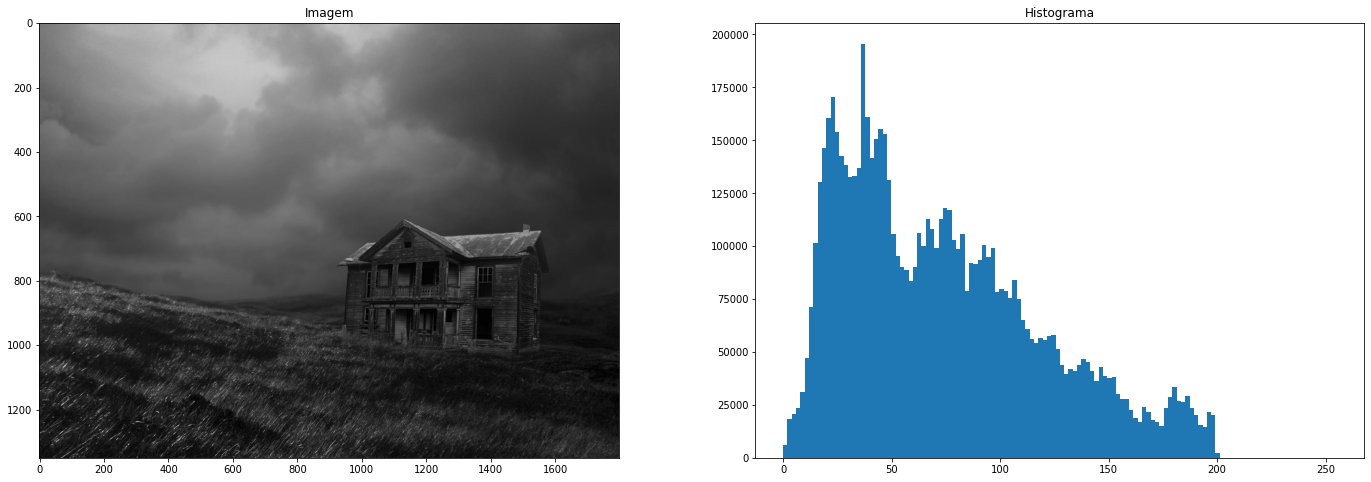

In [44]:
# Representação da imagem e correção do canal de cor

plt.subplots(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))         # Alterando o formato da imagem de BGR para RGB (necessário para o matplotlib).
plt.title('Imagem')

plt.subplot(1, 2, 2)
plt.hist(imagem.flatten(), 128)                             # Transforma a imagem em um vetor (1350, 1800, 3) -> (7290000) e plota o histograma da imagem.
plt.title('Histograma')


Observando o histograma é possível notar que a maior parte dos pixels aprsentam intensidades mais próximas de zero, evidenciando que se trata de uma imgem predominantemente escura e com baixo contraste.

## Equalização da Imagem

Utilizando o método equalizeHist da biblioteca OpenCV, foi aplicado a equalização da imagem afim de obter um aumento de contraste da imagem. Este procedimento pode ser descrito em três estapas, são elas:

1. Calculo do histograma da imagem.
2. Normalização do histograma para que a soma de seus binários seja igual a 255.
3. Calcula a integral do histograma:

$${H'_i = \sum _{0 \le j < i} H(j)}$$

4. Transforma a imagem utilizando $H'$ como uma tabela de consulta:

$$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))$$

In [45]:
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)         # Converte a imagem para cinza
eq = cv2.equalizeHist(gray)                             # Equaliza a imagem utilizando a biblioteca cv2

Text(0.5, 1.0, 'Histograma')

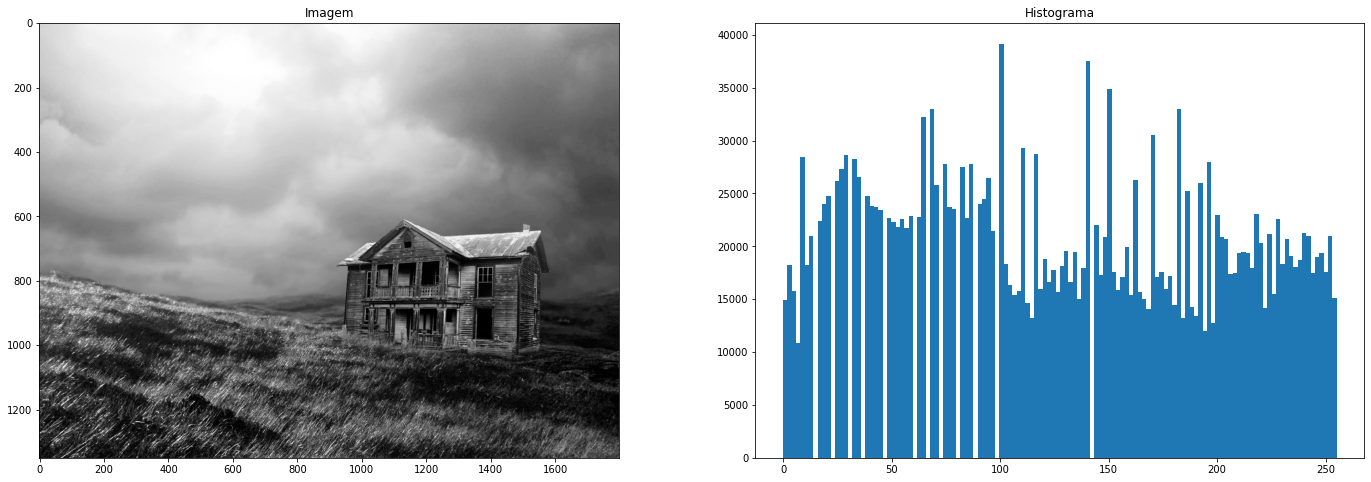

In [46]:
plt.subplots(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.imshow(eq, cmap='gray')
plt.title('Imagem')

plt.subplot(1, 2, 2)
plt.hist(eq.flatten(), 128)
plt.title('Histograma')

Após aplicar a equalização de histograma é possível notar, pelo histograma e pela imagem, que houve um aumento no contraste.


## Comparando com a imagem original

Text(0.5, 1.0, 'Histograma Equalizado')

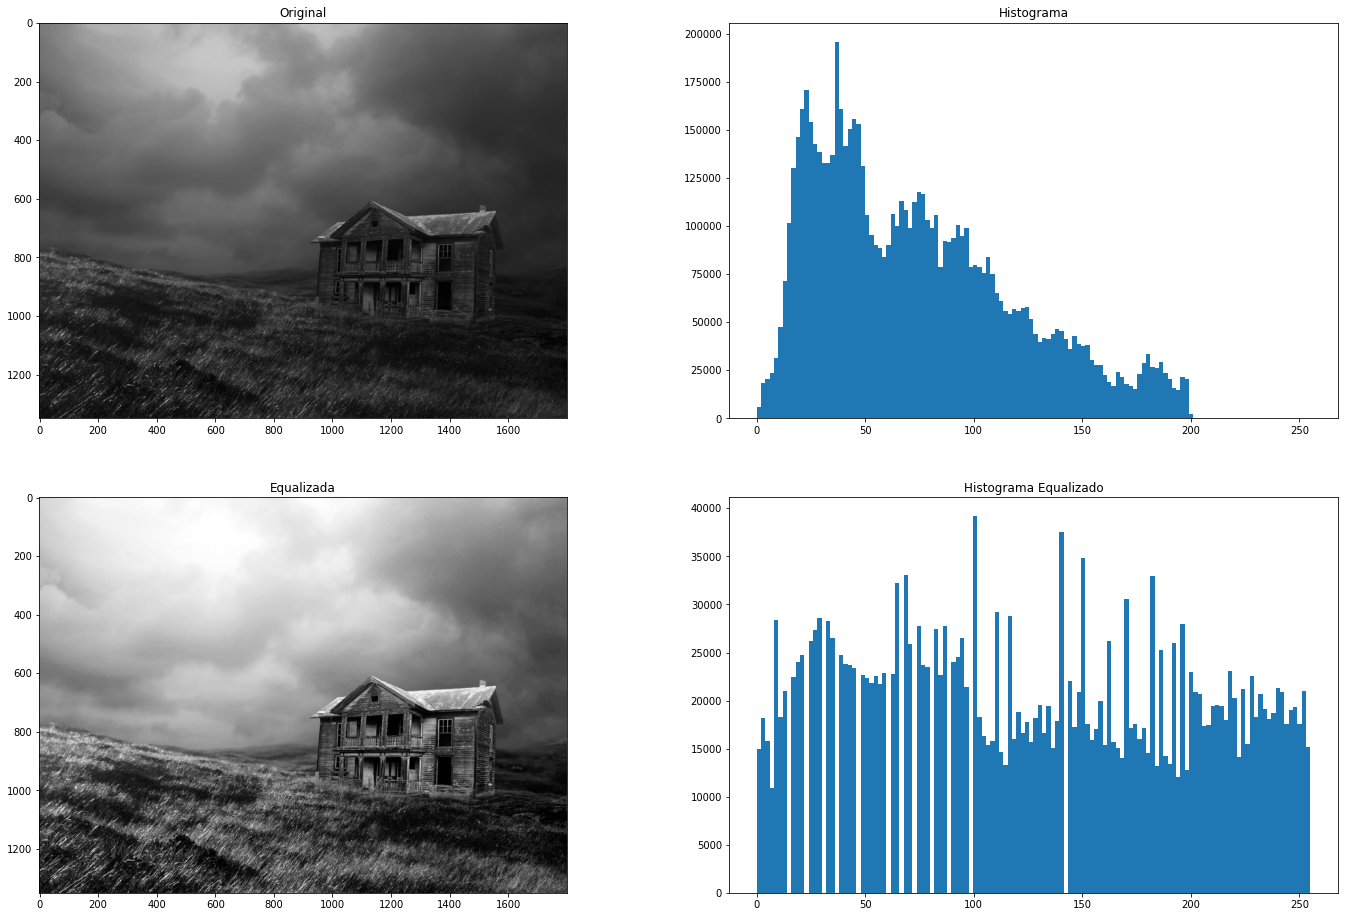

In [47]:
plt.subplots(figsize=(24, 16))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(2, 2, 2)
plt.hist(imagem.flatten(), 128)
plt.title('Histograma')

plt.subplot(2, 2, 3)
plt.imshow(eq, cmap='gray')
plt.title('Equalizada')

plt.subplot(2, 2, 4)
plt.hist(eq.flatten(), 128)
plt.title('Histograma Equalizado')


## Cálculo das Funções de Distribuição Acumuladas


O cálculo da Função de Distribuição Acumulada consiste em realizar a soma acumulada dos valores presentes no vetor e em seguida realizar a normalização. Essa abordagem, assim como o histograma, nos ajuda a descrever a relação entre os tons dos pixels da imagem. 

In [48]:

hist_original, bins = np.histogram(imagem.flatten(), 256, [0,256])
cdf_original = hist_original.cumsum()
cdf_original_normalized = cdf_original * float(hist_original.max()) / cdf_original.max()

hist_eq, bins = np.histogram(eq.flatten(),256,[0,256])
cdf_eq = hist_eq.cumsum()
cdf_eq_normalized = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

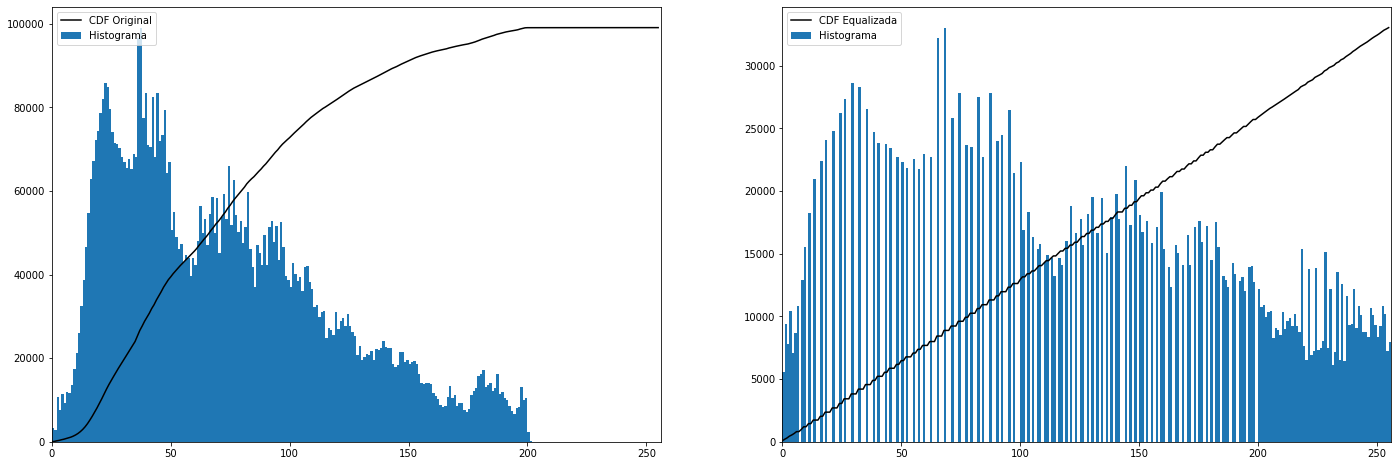

In [49]:

plt.subplots(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(cdf_original_normalized, color = 'k')
plt.hist(imagem.flatten(), 256, [0,256])
plt.xlim([0,256])
plt.legend(('CDF Original','Histograma'), loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(cdf_eq_normalized, color = 'k')
plt.hist(eq.flatten(),256,[0,256])
plt.xlim([0,256])
plt.legend(('CDF Equalizada','Histograma'), loc = 'upper left')
plt.show()

Comparando o resultado obtido com as duas análises, podemos verificar que após a equalização, os valores de intensidade dos pixels contribuem de forma mais uniforme, aumentando o contraste da imagem. O gráfico de distribuição acumulada da imagem original possui um caráter logaritmico, uma vez que os pixels com menor intensidade são os mais presentes.

#Limiarização - Definindo um treshold na intensidade dos pixels

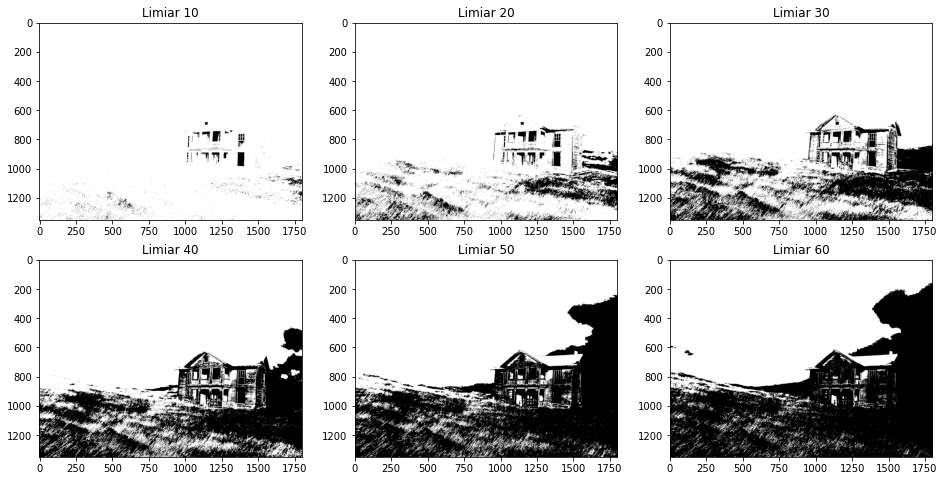

In [55]:
from PIL import Image
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import imFerramentas as imF

img = array(Image.open('imagem_sem_ruido.jpg').convert('L'))

#varias resolucoes em histograma
fig = plt.figure(figsize=(16, 8))
aux = 1
for lim in [10,20,30,40,50,60]:
  a = fig.add_subplot(2, 3, aux)
  imgplot = plt.imshow(imF.limiarizacao(img,lim),cmap="gray")
  a.set_title('Limiar '+str(lim))
  aux = aux + 1

**Atividade 2. Imagem ruidosa**

Imagens digitais são representações binárias da energia luminosa que um objeto emite ou reflete, e sua aquisição é feita através de células fotosensíveis. Como qualquer processo de amostragem, a aquisição de imagens digitais é suscetível a ruídos, que posteriormente devem ser tratados através de filtros.

O objetivo desta atividade, é utilizar técnicas para redução de ruídos, de forma a removê-los sem causar prejuízo as características originais e qualidade da imagem.

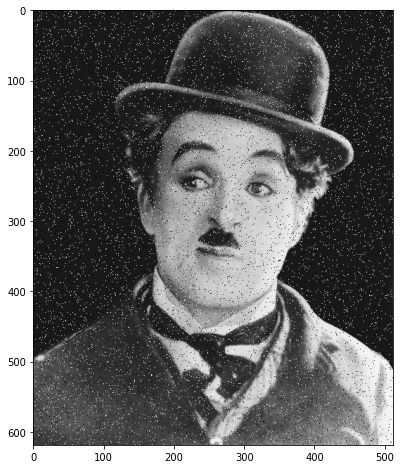

In [31]:
plt.figure(figsize=(16, 8))
noise = cv2.imread('imagem_ruido.png')
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB))

Observando a imagem acima, podemos notar que existem diversos pontos ruídosos, este tipo de ruído é conhecido como sal e pimenta, pois se trata de um ruído com grande amplitude e irregularidade. Este tipo de ruído pode ser tratado utilizand técnicas de suavização.

A biblioteca cv2 possui diversos métodos de suavização que podemos utilizar para tratar imagens ruídosas, dentre eles podemos destacar o filtro de média, mediana, gaussiana e bilateral.

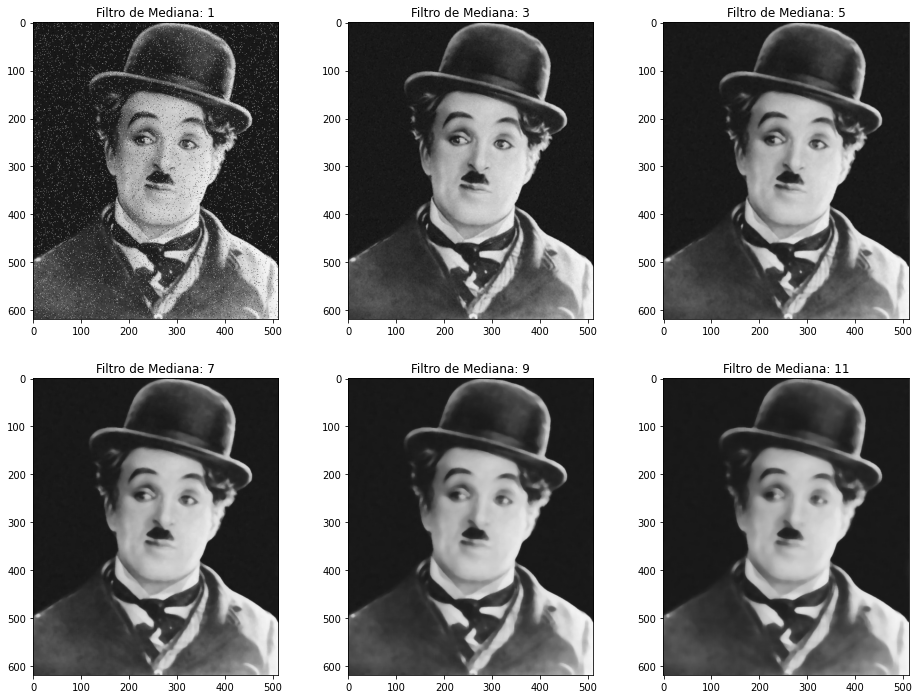

In [32]:
median_params = (1, 3, 5, 7, 9, 11) #Tamanho da máscara

fig = plt.figure(figsize=(16, 12))
aux = 1

for m in median_params:
    a = fig.add_subplot(2, 3, aux)
    median = cv2.medianBlur(noise, m) 
    plt.imshow(median, cmap='gray')
    plt.title('Filtro de Mediana: ' + str(m))
    aux += 1

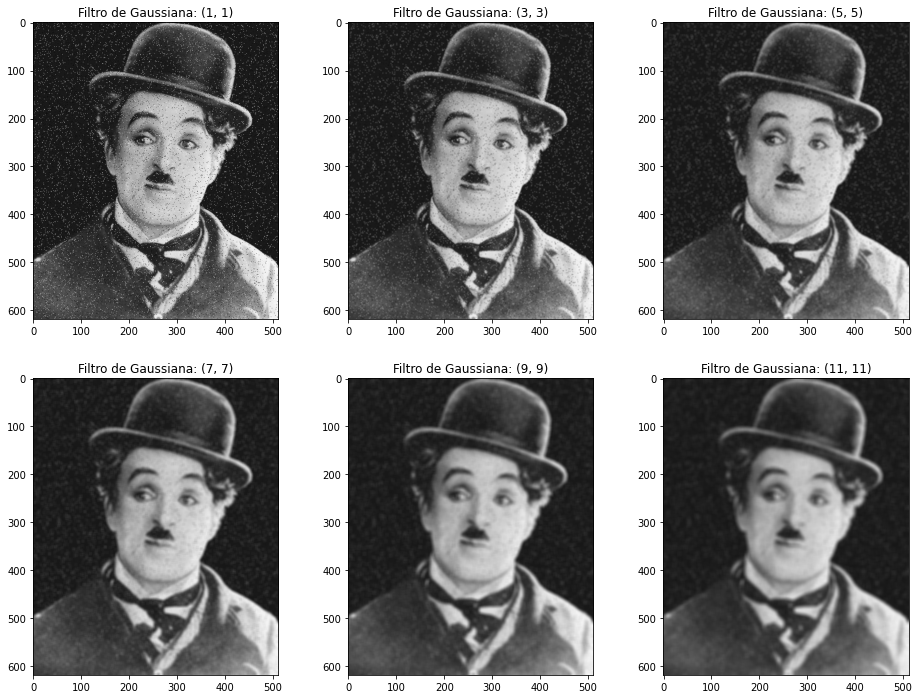

In [33]:
gaussian_params = ((1,1), (3,3), (5,5), (7,7), (9,9), (11,11))

fig = plt.figure(figsize=(16, 12))
aux = 1

for g in gaussian_params:
    a = fig.add_subplot(2, 3, aux)
    gaussian = cv2.GaussianBlur(noise, g, 5)
    plt.imshow(gaussian, cmap='gray')
    plt.title('Filtro de Gaussiana: ' + str(g))
    aux += 1

Text(0.5, 1.0, 'Histograma Filtrada')

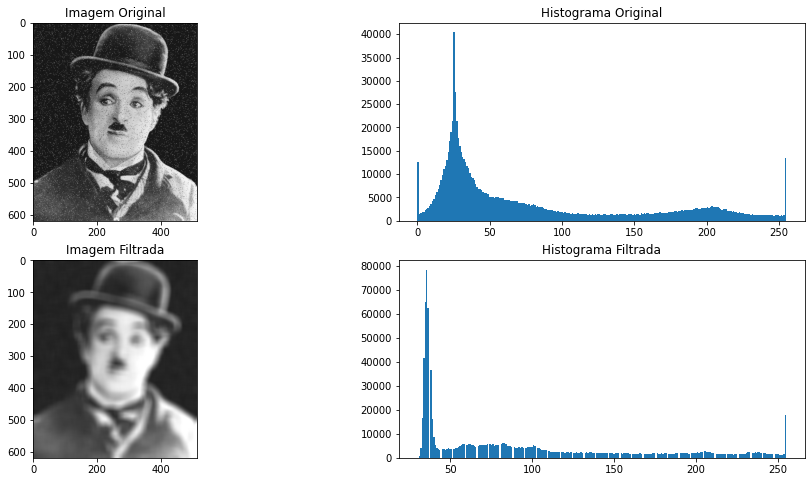

In [34]:
# aplicando um filtro de média 5x5
dimensao_mascara = np.ones((25,25),np.float32)/525
imagem_filtrada_media = cv2.filter2D(noise,-1,dimensao_mascara)


fig = plt.figure(figsize=(16, 8))
sub_imagem = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(noise,cmap="gray")
sub_imagem.set_title('Imagem Original')

sub_imagem = fig.add_subplot(2, 2, 2)
plt.hist(noise.flatten(), 256)
sub_imagem.set_title('Histograma Original')

sub_imagem = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(imagem_filtrada_media,cmap="gray")
sub_imagem.set_title('Imagem Filtrada')

sub_imagem = fig.add_subplot(2, 2, 4)
plt.hist(imagem_filtrada_media.flatten(), 256)
sub_imagem.set_title('Histograma Filtrada')

Findada esta análise, selecionamos a melhor amostra gerada por cada tipo de filtro aplicado, baseada em dois principais fatores:

1. Extração do ruído presente na imagem original.
2. Alteração das caracteristicas do original após o processo de filtragem (Ex.: Perda de contraste, imagem excessivamente borrada etc.).

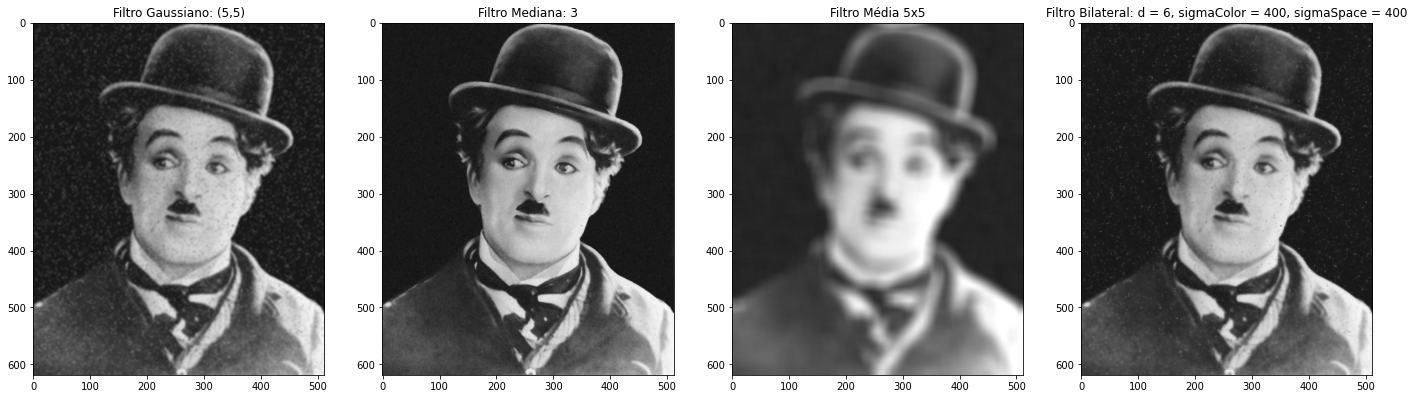

In [35]:
imagem_gaussian = cv2.GaussianBlur(noise, (5,5), 5)
imagem_median = cv2.medianBlur(noise, 3)  
imagem_bilateral = cv2.bilateralFilter(noise, 6, 400, 400)
imagem_media = cv2.filter2D(noise,-1,dimensao_mascara)

plt.subplots(figsize=(24, 8))

plt.subplot(1, 4, 1)
plt.imshow(imagem_gaussian, cmap='gray')
plt.title('Filtro Gaussiano: (5,5)')

plt.subplot(1, 4, 2)
plt.imshow(imagem_median, cmap='gray')
plt.title('Filtro Mediana: 3')

plt.subplot(1, 4, 3)
plt.imshow(imagem_media, cmap='gray')
plt.title('Filtro Média 5x5')

plt.subplot(1, 4, 4)
plt.imshow(imagem_bilateral, cmap='gray')
plt.title('Filtro Bilateral: d = 6, sigmaColor = 400, sigmaSpace = 400')
plt.show()


Observando as imagens acima, podemos notar que os filtros que renderam os melhores resultados foram o de mediana e bilateral, uma vez que foram capazes de reduzir consideravelmente o nível de ruído e ainda manter as características originais da imagem. 